<a href="https://colab.research.google.com/github/neha-soni-16/gesture-recognition/blob/master/B19CSE058~Gesture_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load Dataset

In [ ]:
features = np.load('/content/X.npy')
label = np.load('/content/Y.npy')

In [ ]:
features.shape

(2062, 64, 64)

In [ ]:
label.shape

(2062, 10)

Show Image

In [ ]:
img_size = 64

(-0.5, 63.5, 63.5, -0.5)

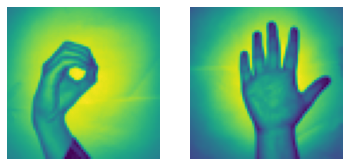

In [ ]:
plt.subplot(1,2,1)
plt.imshow(features[408].reshape(img_size , img_size))
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(features[1855].reshape(img_size , img_size))
plt.axis('off')

Show Image as per Y ( Label File )

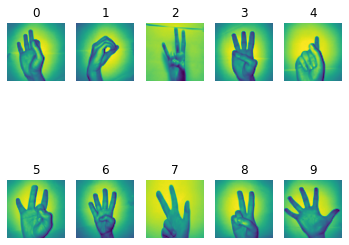

In [ ]:
for i,j in enumerate([0,210,411,700,916,1190,1400,1516,1844,2000]):
  plt.subplot(2,5,i+1)
  plt.subplots_adjust(top = 2, bottom = 1)
  plt.imshow(features[j].reshape(64,64))
  plt.title(np.argmax(label[j]))
  plt.axis('off')

Images and labels are mismatched....
creating count list for counting each class

In [ ]:
count = []

for i in label:
  if (i[0] == 1):
    count.append(0)
  elif (i[1] == 1):
    count.append(1)
  elif (i[2] == 1):
    count.append(2)
  elif (i[3] == 1):
    count.append(3)
  elif (i[4] == 1):
    count.append(4)
  elif (i[5] == 1):
    count.append(5)
  elif (i[6] == 1):
    count.append(6)
  elif (i[7] == 1):
    count.append(7)
  elif (i[8] == 1):
    count.append(8)
  elif (i[9] == 1):
    count.append(9)

In [ ]:
count = pd.DataFrame(count)
count.value_counts()

5    208
9    207
6    207
3    207
8    206
7    206
4    206
2    206
1    205
0    204
dtype: int64

In [ ]:
zero = [0]*205
one = [1]*206
two = [2]*206
three = [3]*206
four = [4]*207
five = [5]*207
six = [6]*207
seven = [7]*206
eight = [8]*208
nine = [9]*204

creating label array

In [ ]:
f = np.concatenate((features[0:204] ,
                    features[204:409] ,
                    features[409 : 615] , 
                    features[615:822] ,
                    features[822:1028] , 
                    features[1028:1236] , 
                    features[1236:1443] , 
                    features[1443:1649] , 
                    features[1649:1855] , 
                    features[1855:2062]) , axis = 0)

t = np.concatenate((nine, 
                    zero , 
                    seven , 
                    six , 
                    one , 
                    eight , 
                    four , 
                    three , 
                    two , 
                    five) , axis = 0)

In [ ]:
f.shape

(2062, 64, 64)

In [ ]:
t.shape

(2062,)

Train Test split

In [ ]:
from sklearn.model_selection import train_test_split

f_train , f_test , t_train , t_test = train_test_split(f , t , test_size = 0.1 , random_state = 10)

Reshaping Array

In [ ]:
x = f_train.shape[0]
y = t_test.shape[0]

f_train_flat = f_train.reshape(x , f_train.shape[1]*f_train.shape[2])
f_test_flat = f_test.reshape(y , f_test.shape[1]*f_test.shape[2])

In [ ]:
f_train_trans = f_train_flat.T
f_test_trans = f_test_flat.T
t_train_trans = t_train.T
t_test_trans = t_test.T

Training Model using sklearn pipeline - LogisticRegression

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

using Standard Scalar to Transform data to have 0 mean and unit variance

In [ ]:
lr = LogisticRegression(random_state = 16 , max_iter = 1000)
pipe = make_pipeline(StandardScaler(), lr)
pipe.fit(f_train_flat , t_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=16,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

Testing Accuracy in %

In [ ]:
pipe.score(f_test_flat , t_test )*100

75.84541062801932

Training Accuracy in %

In [ ]:
pipe.score(f_train_flat , t_train )*100

100.0

Training Model using sklearn pipeline - RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=400 , criterion='gini' , random_state=10)
pipe_rf = make_pipeline(StandardScaler(), rf)
pipe_rf.fit(f_train_flat , t_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=400, n_jobs=None,
                                        oob_score=False, random_state=10,
                                        verbose=0, warm_start=False))],
         verbose=Fal

Testing Accuracy

In [ ]:
pipe_rf.score(f_test_flat , t_test )*100

78.26086956521739

Training Accuracy

In [ ]:
pipe_rf.score(f_train_flat , t_train )*100

100.0

Data Augmentation

Augmented training image and training label list

In [ ]:
f_aug = []
t_aug = []

using skimage transform

In [ ]:
from skimage import transform
from skimage.transform import rotate
from skimage.transform import AffineTransform

image rotation

In [ ]:
for i in range(0, f_train.shape[0], 2):
  r1 = rotate(f_train[i], angle=10)
  r2 = rotate(f_train[i], angle=20)
  r3 = rotate(f_train[i], angle=-10)
  r4 = rotate(f_train[i], angle=-20)
  f_aug.append(r1)
  f_aug.append(r2)
  f_aug.append(r3)
  f_aug.append(r4)
  t_aug.append(t_train[i])
  t_aug.append(t_train[i])
  t_aug.append(t_train[i])
  t_aug.append(t_train[i])

(-0.5, 63.5, 63.5, -0.5)

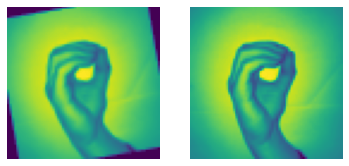

In [ ]:
plt.subplot(1,2,1)
plt.imshow(f_aug[0].reshape(img_size , img_size))
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(f_train[0].reshape(img_size , img_size))
plt.axis('off')

Sheared Image

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


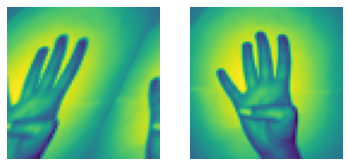

In [ ]:
for i in range(0, f_train.shape[0], 3):
  tf = AffineTransform(shear=-0.5)
  sheared = transform.warp(f_train[i], tf, order=1, preserve_range=True, mode='wrap')
  f_aug.append(sheared)
  t_aug.append(t_train[i])

  plt.subplot(1,2,1)
  plt.imshow(sheared.reshape(img_size , img_size))
  plt.axis('off')
  plt.subplot(1,2,2)
  plt.imshow(f_train[i].reshape(img_size , img_size))
  plt.axis('off')

Rescaling Image

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


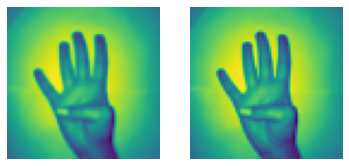

In [ ]:
for i in range(0, f_train.shape[0], 3):
  rescaled = transform.rescale(f_train[i], 1.1)
  f_aug.append(sheared)
  t_aug.append(t_train[i])

  plt.subplot(1,2,1)
  plt.imshow(rescaled)
  plt.axis('off')
  plt.subplot(1,2,2)
  plt.imshow(f_train[i].reshape(img_size , img_size))
  plt.axis('off')

Increase Brightness

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


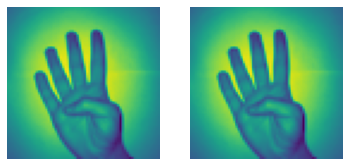

In [ ]:
for i in range(0, f_train.shape[0], 4):
  bright = f_train[i] + 100/255
  f_aug.append(bright)
  t_aug.append(t_train[i])

  plt.subplot(1,2,1)
  plt.imshow(bright.reshape(img_size , img_size))
  plt.axis('off')
  plt.subplot(1,2,2)
  plt.imshow(f_train[i].reshape(img_size , img_size))
  plt.axis('off')

Adding Contrast

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


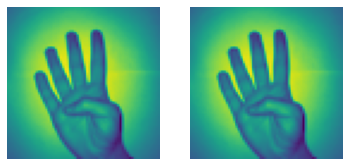

In [ ]:
for i in range(0, f_train.shape[0], 4):
  con = f_train[i]*1.5
  f_aug.append(con)
  t_aug.append(t_train[i])


  plt.subplot(1,2,1)
  plt.imshow(con.reshape(img_size , img_size))
  plt.axis('off')
  plt.subplot(1,2,2)
  plt.imshow(f_train[i].reshape(img_size , img_size))
  plt.axis('off')

In [ ]:
f_aug[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
t_aug[0]

0

Appending Prior f_train & and t_train to f_aug & t_aug

In [ ]:
for i in f_train:
  f_aug.append(i)
for j in t_train:
  t_aug.append(j)

Transforming list to numpy arrays

In [ ]:
f_aug = np.array(f_aug)
t_aug = np.array(t_aug)

In [ ]:
f_aug.shape

(7733, 64, 64)

Reshaping Training array

In [ ]:
x_aug = f_aug.shape[0]

f_train_flat_aug = f_aug.reshape(x_aug , f_aug.shape[1]*f_aug.shape[2])

Training model using RandomForestClassifier

In [ ]:
rf_aug = RandomForestClassifier(n_estimators=400 , criterion='gini' , random_state=10)
pipe_rf_aug = make_pipeline(StandardScaler(), rf)
pipe_rf_aug.fit(f_train_flat_aug , t_aug)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=400, n_jobs=None,
                                        oob_score=False, random_state=10,
                                        verbose=0, warm_start=False))],
         verbose=Fal

Testing Score 

In [ ]:
pipe_rf_aug.score(f_test_flat , t_test)*100

80.19323671497585

Training Score

In [ ]:
pipe_rf_aug.score(f_train_flat , t_train )*100

100.0